# A Simple NMF (Nonnegative Matrix Factorization) Application Example
## Decomposing the Introductions of: 
## Guns n' Roses - Sweet Child O' Mine

## Short Intuition about NMF
The main idea of matrix decomposition is to represent a matrix as a product of other matrices.
In general terms, the NMF technique factorizes a matrix V with nonnegative values into two matrices W and H with also nonnegative values $ V \approx W \cdot H $.




In [9]:
# Import Python Packages
import numpy as np, scipy, matplotlib.pyplot as plt, librosa, IPython.display, librosa.display

#Other Configurations
%matplotlib notebook
#jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000  - Open jupyter notebook setting iopub_data_rate

In [10]:
# Importing audio file
filename = 'Guns N Roses-Sweet Child O Mine Intro.wav'
x, fs = librosa.load(filename)

In [11]:
# Playback audio file
IPython.display.Audio(x, rate=fs)

In [12]:
# Audio data information
print("x Shape=", x.shape)
print("Sample rate fs=", fs)
print("Audio Lenght in seconds=%d [s]" % (x.shape[0]/fs))

x Shape= (330750,)
Sample rate fs= 22050
Audio Lenght in seconds=15 [s]


In [13]:
# Detect Onset Frames
onset_frames = librosa.onset.onset_detect(x, sr=fs)
# Get Onset Times
onset_times = librosa.frames_to_time(onset_frames)

<IPython.core.display.Javascript object>


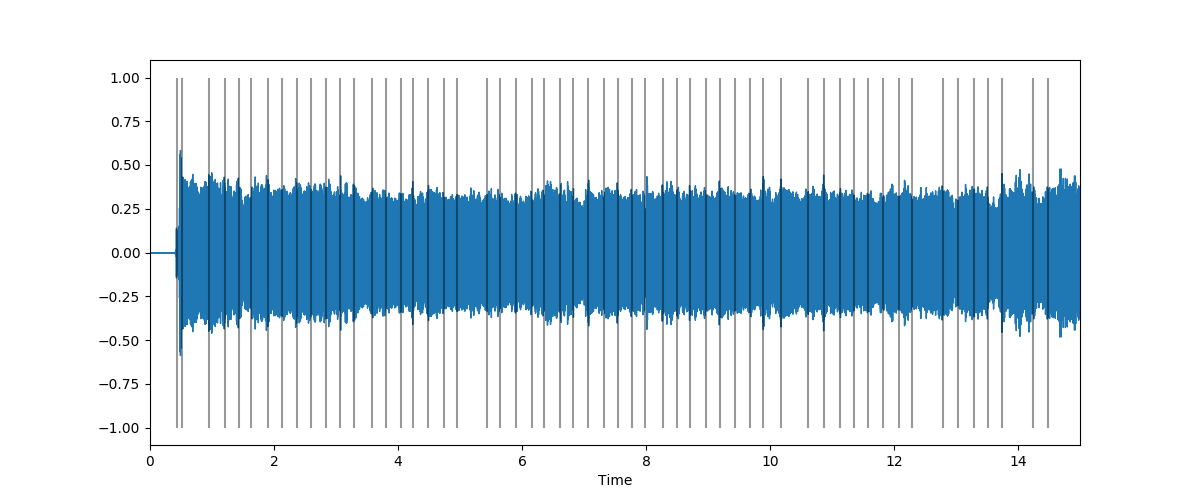

In [14]:
# Plot Onset on Top of Waveform
plt.figure(figsize=(12, 5))
librosa.display.waveplot(x, sr=fs)
plt.vlines(onset_times, -1,1, color='k', alpha=0.4)

X Shape (1025, 646)


<IPython.core.display.Javascript object>


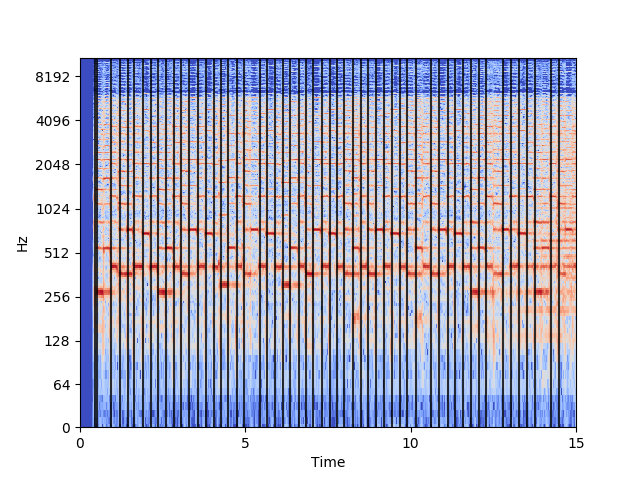

In [15]:
# STFT
S = librosa.stft(x)
X = np.absolute(S)
print("X Shape",X.shape)
import librosa.display
logS = librosa.core.amplitude_to_db(np.abs(S))
plt.figure()
librosa.display.specshow(logS, sr=fs, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, fs/2, color='k', alpha=0.8)

<IPython.core.display.Javascript object>


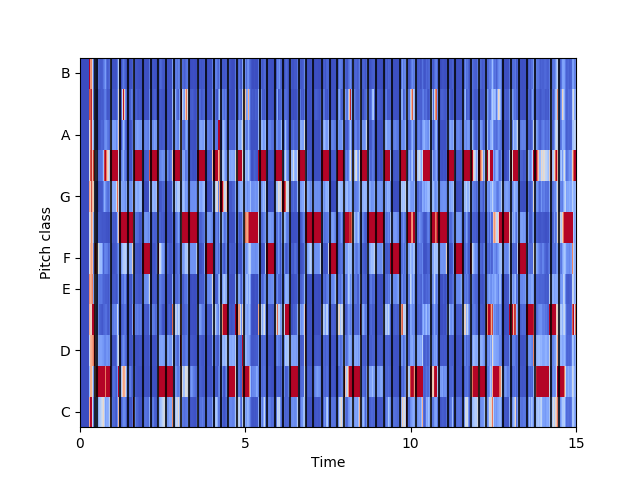

In [16]:
# Chroma
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=fs, hop_length=hop_length)
plt.figure()
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.vlines(onset_times, 0, 10000, color='k', alpha=0.8);

In [17]:
# NMF Decomposition
n_components = 8
W, H = librosa.decompose.decompose(X, n_components=n_components, sort=True)
print('W shape=',W.shape)
print('H shape=',H.shape)

W shape= (1025, 8)
H shape= (8, 646)


<IPython.core.display.Javascript object>


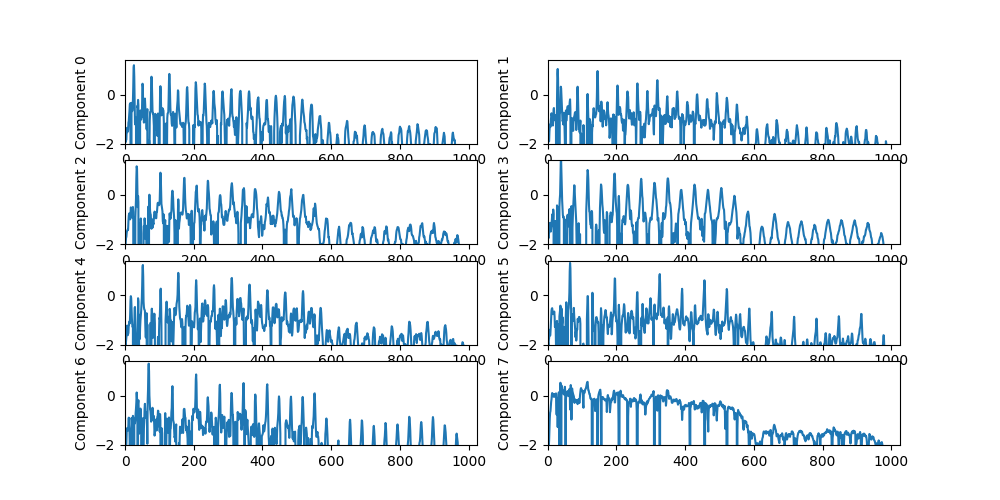

In [18]:
# Plotting W Components
plt.figure(figsize=(10, 5))
W[W<np.finfo(float).eps]=np.finfo(float).eps
logW = np.log10(W)
for n in range(n_components):
    plt.subplot(np.ceil(n_components/2.0), 2, n+1)
    plt.plot(logW[:,n])
    plt.ylim(-2, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)

In [19]:
# Playback decomposed signals
reconstructed_signal = scipy.zeros(len(x))
for n in range(n_components):
    print('Component ',n)
    Y = scipy.outer(W[:,n], H[n])*np.exp(1j*np.angle(S))
    y = librosa.istft(Y)
    reconstructed_signal[:len(y)] += y
    IPython.display.display( IPython.display.Audio(y, rate=fs) )
print("Reconstructed Signal")
IPython.display.display( IPython.display.Audio(reconstructed_signal, rate=fs) )

Component  0


Component  1


Component  2


Component  3


Component  4


Component  5


Component  6


Component  7


Reconstructed Signal


# Conclusions
 Streets of Philadelphia introduction consists of a drums sequence  with a kick drum, a snare drum, a hi-hat and some background ambience. NMF component 0 consists most of the kick drum, and component 1 has most of the snare drum. 
 
 Sweet Child O' Mine introduction is a guitar riff based on the Db Major scale which consists of the pitches D♭, E♭, F, G♭, A♭, B♭ and C. 
 In this particcular piece B♭ and C are not played <br>
 The NMF decomposition resulted in the following components: <br>
- Component 0. $	\rightarrow$  D♭ 
- Component 1.  $	\rightarrow$ E♭
- Component 2.  $	\rightarrow$ G♭
- Component 3.  $	\rightarrow$ A♭
- Component 4.  $	\rightarrow$ D♭ (one octave higher than Component 0)
- Component 5.  $	\rightarrow$ F 
- Component 6.  $	\rightarrow$ G♭ (one octave higher than Component 2)
- Component 7.  $	\rightarrow$ Can be interpreted perhaps as the percusive component os all notes.
The decomposition is pretty much aligned with the chroma plot.

